In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(tidyr)))
suppressPackageStartupMessages(suppressWarnings(library(shiny)))

In [2]:
# set UMAP df path
umap_df_path <- file.path("..","..","1.scDINO_run/outputdir/apoptosis_timelapse/CLS_features/CLS_features_annotated_umap.csv")
# load UMAP df
umap_df <- read.csv(umap_df_path)
options(repr.matrix.max.rows = 10, repr.matrix.max.cols = 5)

head(umap_df)

,X,Metadata_image_path,Metadata_Well,⋯,UMAP1,UMAP2
,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>
1,0,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_102/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_102_index_111256_crop.tiff,C-02,⋯,0.8071025,4.956420
2,1,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_106/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_106_index_111257_crop.tiff,C-02,⋯,1.4179845,4.481785
3,2,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_121/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_121_index_111258_crop.tiff,C-02,⋯,1.4918495,5.010065
4,3,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_127/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_127_index_111259_crop.tiff,C-02,⋯,-2.5990250,3.443170
5,4,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_13/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_13_index_111241_crop.tiff,C-02,⋯,2.9537802,3.543933
6,5,../0.pre-process_images/data/processed_images/sc_crops/C-02_F0001_time_0.0_image_number_1_cell_number_136/C-02_F0001_T0001_Z0001_C01_illumcorrectimage_number_1_cell_number_136_index_111261_crop.tiff,C-02,⋯,-2.9083838,4.530238


In [3]:
unique(umap_df$Metadata_Time)
umap_df$Metadata_Time <- factor(
    umap_df$Metadata_Time,
    levels=c(
        0,1,2,3,4,5,6,7,8,9,10,11,12,13
)
)
unique(umap_df$Metadata_Time)

[1]  1  2 11 12 13  3  4  5  6  7  8  9 10

[1] 1  2  11 12 13 3  4  5  6  7  8  9  10
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13

In [4]:
# get all wells
unique(umap_df$Metadata_Well)

[1] "C-02" "C-03" "C-04" "C-05" "C-06" "C-07" "C-08" "C-09" "C-10" "C-11"
[11] "D-02" "D-03" "D-04" "D-05" "D-06" "D-07" "D-08" "D-09" "D-10" "D-11"
[21] "E-02" "E-03" "E-04" "E-05" "E-06" "E-07" "E-08" "E-09" "E-10" "E-11"

In [5]:
# remove the T from the time column
umap_df$Metadata_Time <- gsub("T","",umap_df$Metadata_Time)
# convert to numeric
umap_df$Metadata_Time <- as.numeric(umap_df$Metadata_Time)


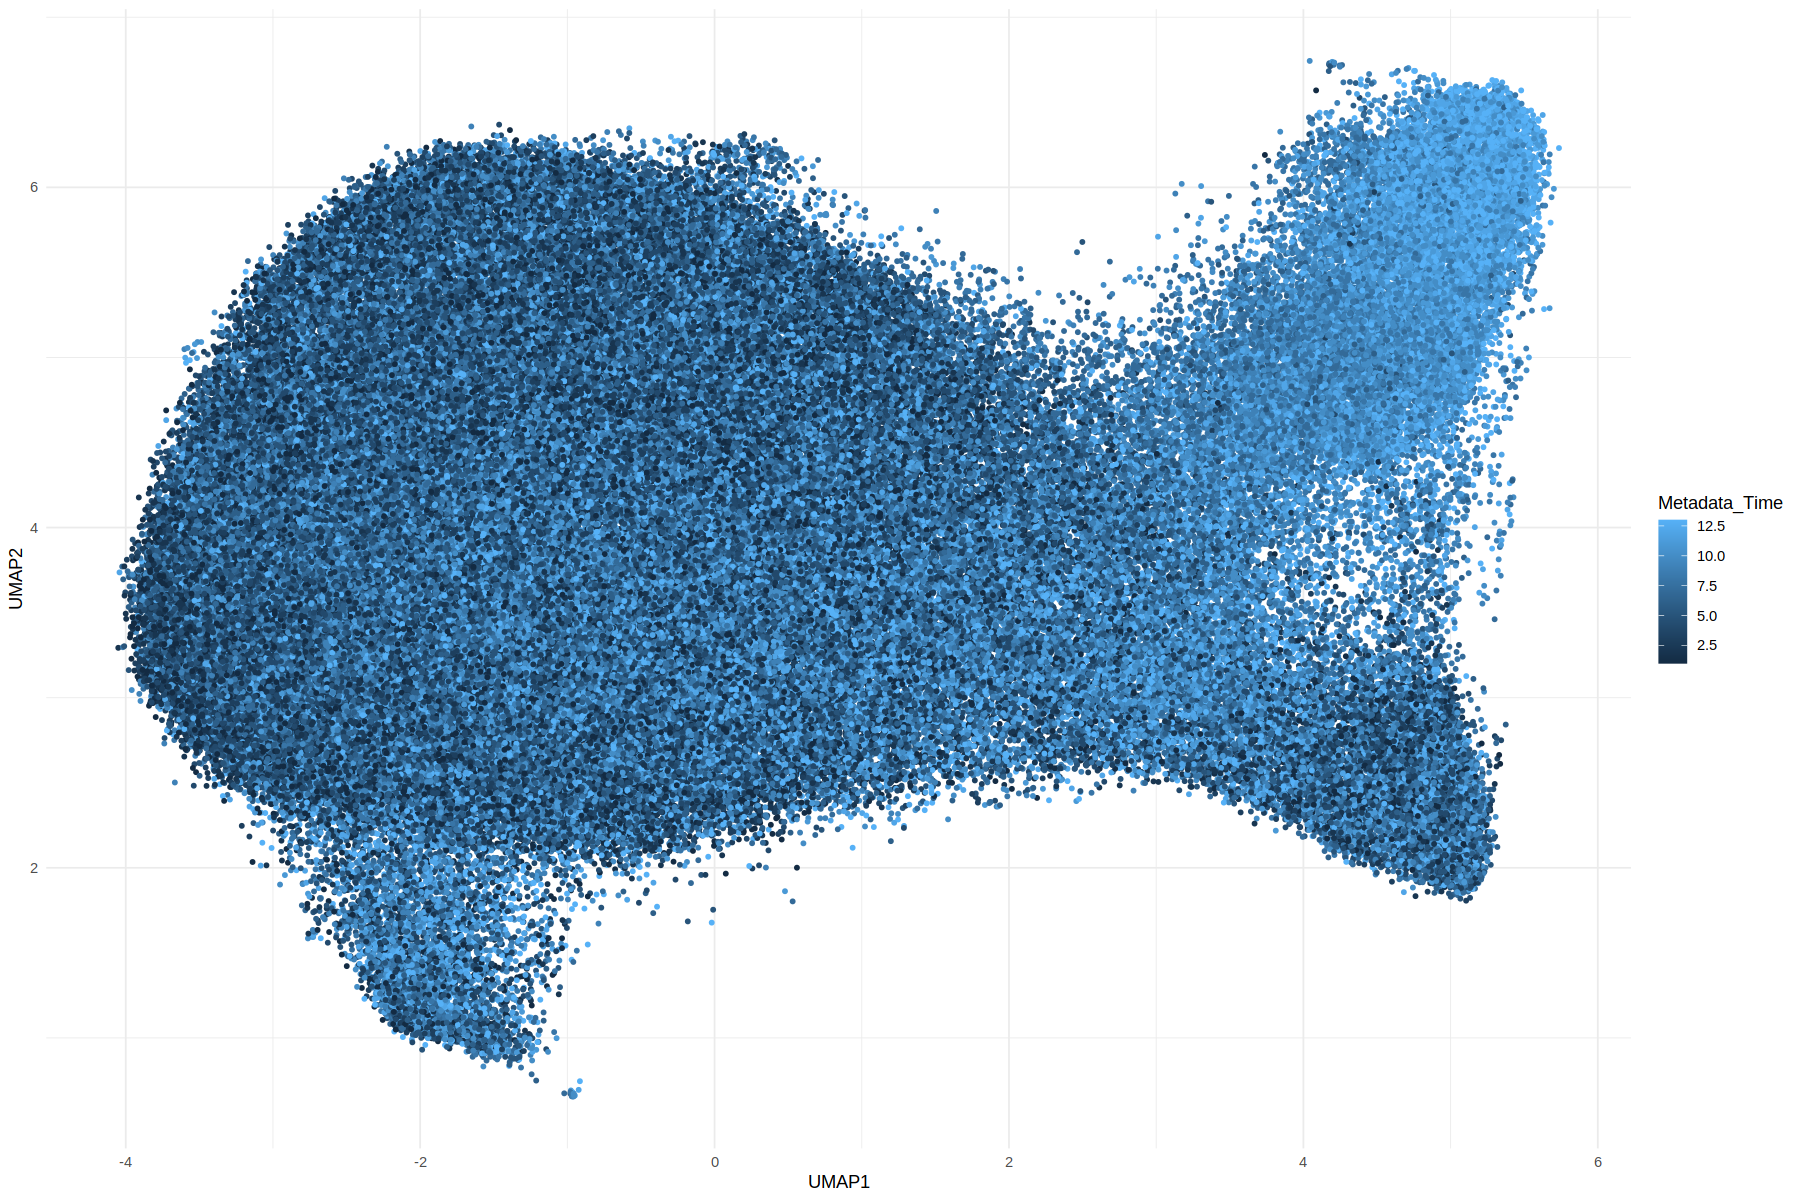

In [6]:
# plot UMAP
width <- 15
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
umap_plot <- (
    ggplot(umap_df, aes(x = UMAP1, y = UMAP2, color = Metadata_Time))
    + geom_point(size = 1)
    + theme_minimal()
    + theme(legend.position = "right")
)
umap_plot